Import necessary libraries
- time for random number seed
- matplot for data visualization
- math for math

In [63]:
import time
import matplotlib.pyplot as plt
from math import log, sqrt, pi

Utilize a Linear Congruential Genertor to generate psuedo random numbers from 0-1

In [64]:
def get_random_list(i, length):
    """
    Utilize a Linear Congruential Genertor to generate psuedo random numbers from 0-1

    """
    m = 2**31 - 1  # A large prime number
    a = 7**5       # Some large number
    c = 12345
    random_list = []

    for j in range(length):
        i = (a * i + c) % m
        random_list.append(i/m)

    return random_list

Test the random number generator by plotting a histogram of the generated values

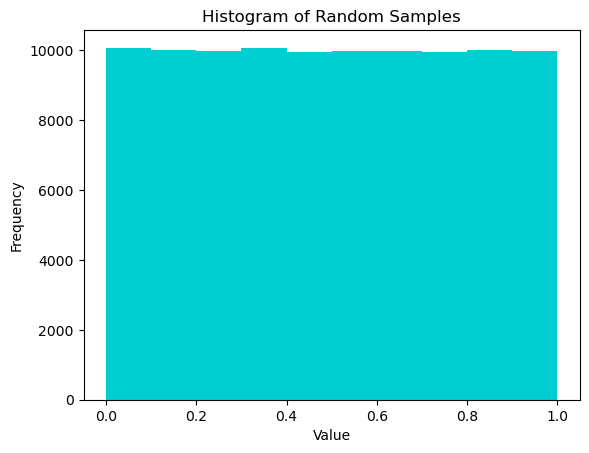

<Figure size 640x480 with 0 Axes>

In [65]:
def plot_data_random(data):

    # Create a histogram
    plt.hist(data, bins=10, color='darkturquoise')  # Adjust the number of bins as needed

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Random Samples')

    # Show the plot
    plt.show()
    # plt.legend()
    plt.savefig("hist.png")

    
 # Test Random Numbers
i = int(time.time() * 1000)
data = get_random_list(i, 100000)
plot_data_random(data)

Create functions to utlize reimann and monte carlo integration

In [66]:
def left_reimann(function, a, b, n):
    """
    Input: a function, two endpoints, and the desired number of rectangles

    Returns: definite integral of the function, using reimann sums from the left side
    """
    dx = (b-a)/n

    area = 0
    for i in range(n):
        y = function(a + i*dx)
        area += y*dx
    
    return area

def right_reimann(function, a, b, n):
    """
    Input: a function, two endpoints, and the desired number of rectangles

    Returns: definite integral of the function, using reimann sums from the right side
    """
    dx = (b-a)/n

    area = 0

    for i in range(1, n+1):
        y = function(a + i*dx)
        area += y*dx
    
    return area

def center_reimann(function, a, b, n):
    """
    Input: a function, two endpoints, and the desired number of rectangles

    Returns: definite integral of the function, using the midpoint reimann sum
    """
    dx = (b-a)/n

    area = 0

    for i in range(n):
        y = function(a + (i+0.5)*dx)
        area += y*dx
    
    return area

def trapezoid(function, a, b, n):
    """
    Input: a function, two endpoints, and the desired number of trapezoids

    Returns: definite integral of the function, using the trapezoid rule
    """
    dx = (b-a)/n

    area = 0
    area += function(a) * (dx/2)

    for i in range(1, n):
        y = function(a + i*dx)
        area += y * dx
    
    area += function(b) * (dx/2)

    return area


def sampling(function, a, b, n):
    """
    Input: a function, two endpoints, and the desired number of uniform samples

    Returns: definite integral of the function, using the sampling method
    """
    i = int(time.time() * 1000)
    random_list = get_random_list(i, n)

    # Change the bounds of the random numbers
    random_samples = [x * (b - a) + a for x in random_list]
    
    # plot_data_random(random_samples)
  


    function_list = [function(randomx) for randomx in random_samples]
    average = sum(function_list)/n

    area = average * (b-a)
    
    return area

Define a function to run the integrators and compare them to an analytic solution to obtain error

In [67]:
def get_error(numerical_function, a, b, function, analytic):
    
    # Integrate Sample function
    error_list = []
    for n in range(100, 100100, 5000):
        numerical = numerical_function(function, a, b, n)
        error_list.append((log(n), log(abs(numerical - analytic))))
    
    return error_list

Define a function to plot this error for data visualization

In [68]:
def plot_data_error(errors):


    # Unpacking the tuples into separate lists for plotting
    x1, y1 = zip(*errors["left"])
    x2, y2 = zip(*errors["right"])
    x3, y3 = zip(*errors["centered"])
    x4, y4 = zip(*errors["trapezoid"])
    x5, y5 = zip(*errors["sampling"])

    # Plotting the  dataset
    plt.plot(x1, y1, label='Left Reimann', color='blue')
    plt.plot(x2, y2, label='Right Reimann', color='red')
    plt.plot(x3, y3, label='Centered Reimann', color='magenta')
    plt.plot(x4, y4, label='Trapezoid Rule', color='green')
    plt.plot(x5, y5, label='Sampling Method', color='cyan')

    # Adding labels and legend
    plt.xlabel('log of N - value')
    plt.ylabel('log of Error')
    plt.title('Error for each Integrator for different N values')
    plt.legend()

    # Show the plot
    plt.show()

Create example functions to test our integrators on

In [69]:
def g(x):
    # Pi
    return 2*sqrt(-(x**2) + 1)

def f(x):
    return x**2

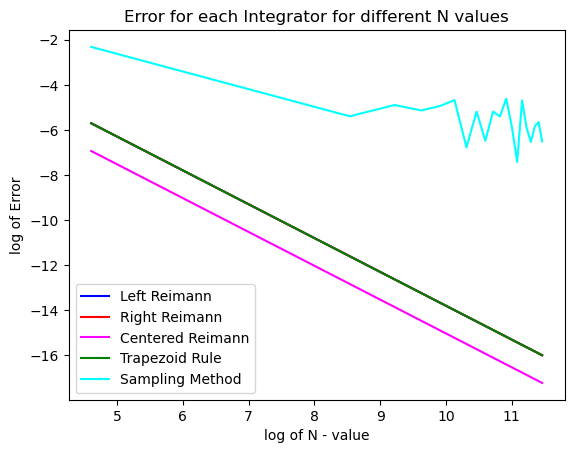

Analytic: 3.141592653589793
3.1415925484068445
3.141592684397153
3.1415925484068445
3.137462124462305


In [70]:
def main():
    a = - 1
    b = 1
    function = g
#   analytic = ((b**3)/3 - (a**3)/3)# for x^2 from 1 --> 2
    analytic = pi # for g


    errors = {
    "left" : get_error(left_reimann, a, b, function, analytic),
    "right" : get_error(right_reimann, a, b, function, analytic),
    "centered" : get_error(center_reimann, a, b, function, analytic),
    "trapezoid" : get_error(trapezoid, a, b, function, analytic),
    "sampling" : get_error(sampling, a, b, function, analytic)
    }
    
    plot_data_error(errors)

    n = 100000
    # Compare with analytic value
    print("Analytic:", analytic)
    print(right_reimann(g, a, b, n))
    print(center_reimann(g, a, b, n))
    print(trapezoid(g, a, b, n))
    print(sampling(g, a, b, n))
    
main()

In the plot above, the error for left and right is behind the trapezoid line. Even though we expect the sampling method error to not decrease as fast as the others, I still think that this error is not decreasing fast or uniformly enough. To try and interperet the inaccuracy of the sampling method, I used the following code:

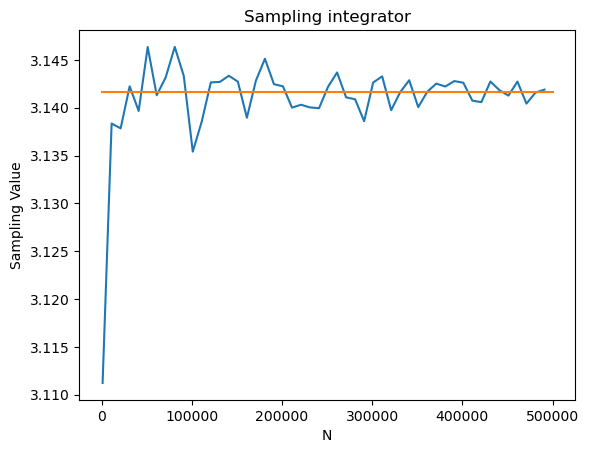

In [72]:
# testing sampling integrator
a = - 1
b = 1
analytic = pi


my_list = []
for n in range(1000, 500100, 10000):
    my_list.append((n, sampling(g, a, b, n)))
    
x, y = zip(*my_list)
x2 = [0, 500000]
y2 = [analytic, analytic]
plt.plot(x, y)
plt.plot(x2, y2)

# Add labels and title
plt.xlabel('N')
plt.ylabel('Sampling Value')
plt.title('Sampling integrator')

# Show the plot
plt.show()
# plt.legend()

As seen above, for n from 100 to 500,000 the sampling answer does get close to the analytical solution after many trials, but it is not much of a convergence to the analytic answer. Typical reasons for this would be that n is not large enough or the random sample is not random or uniform enough. To verify that the random sampling is random and uniform, I plotted the data as follows:

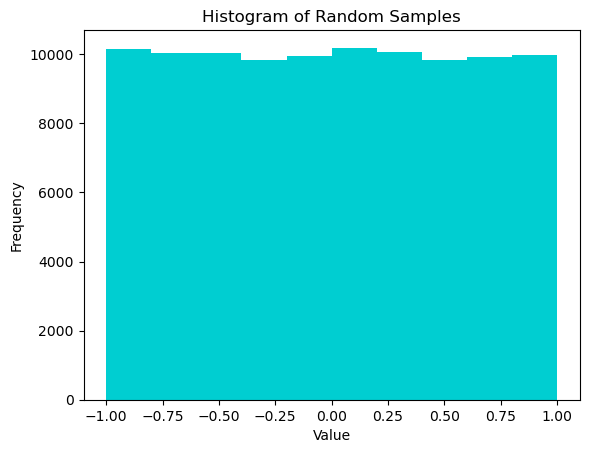

3.140927889852559

<Figure size 640x480 with 0 Axes>

In [62]:
def sampling(function, a, b, n):
    """
    Input: a function, two endpoints, and the desired number of uniform samples

    Returns: definite integral of the function, using the sampling method
    """
    i = int(time.time() * 1000)
    random_list = get_random_list(i, n)

    # Change the bounds of the random numbers
    random_samples = [x * (b - a) + a for x in random_list]
    
    plot_data_random(random_samples)


    function_list = [function(randomx) for randomx in random_samples]
    average = sum(function_list)/n

    area = average * (b-a)
    
    return area
    
sampling(g, -1, 1, 100000)

As seen above, the random samples are between the correct limits and is uniform. Thus, outside of an error in the code, we can assume that a larger n-value is required for more accurate results.